In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('complete_dataset.csv')


In [15]:
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890


In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [17]:
#Creating 'Population' and 'Income' dataframe from the main dataframe


bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])


In [18]:
bangalore_population.head()


,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [19]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])


In [20]:
bangalore_income.head()


,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [21]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [22]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [23]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()


In [24]:
unique_boroughs_of_bangalore


['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [25]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [26]:
borough_colors


{'Central': '#4E74AD',
 'Eastern': '#7ED968',
 'NorthEastern': '#A09292',
 'Northern': '#F0A674',
 'SouthEastern': '#702CCE',
 'Southern': '#5E0481',
 'SouthernSuburbs': '#35F107',
 'Western': '#9A7608'}

In [27]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)


In [28]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [93]:
bangalore_map

Exploring bangalore Neighborhoods using FourSquare API


In [30]:

def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [31]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])


Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [32]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])


Total number of venues found in Bangalore are :  592


In [33]:
bangalore_venues.head(5)


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Sree Vishnu Bhavan,12.973950,77.579038,Indian Restaurant


In [34]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)


Venue Category
Indian Restaurant       111
Fast Food Restaurant     28
Café                     28
Bakery                   27
Ice Cream Shop           21
Department Store         18
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       15
Hotel                    12
Name: Neighborhood, dtype: int64

In [35]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))


Total number of unique categories in bangalore are :  131


In [36]:
#Getting number of venues per neighborhood

individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()


In [37]:
individual_bangalore_venue_count


Borough
Borough Neighborhood                 
Central Cantonment area             6
        Domlur                     11
        Indiranagar                65
        Jeevanbheemanagar           6
        Malleswaram                 6
...                               ...
Western Mahalakshmi Layout         11
        Nagarbhavi                  7
        Nayandahalli                2
        Rajarajeshwari Nagar        6
        Vijayanagar                 3

[62 rows x 1 columns]

In [38]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)


In [39]:
individual_bangalore_venue_count.reset_index(inplace=True)


In [40]:
individual_bangalore_venue_count


,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,6
1,Central,Domlur,11
2,Central,Indiranagar,65
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,6
...,...,...,...
57,Western,Mahalakshmi Layout,11
58,Western,Nagarbhavi,7
59,Western,Nayandahalli,2
60,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'R. T. Nagar'),
 Text(30, 0, 'Vidyaranyapura'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli

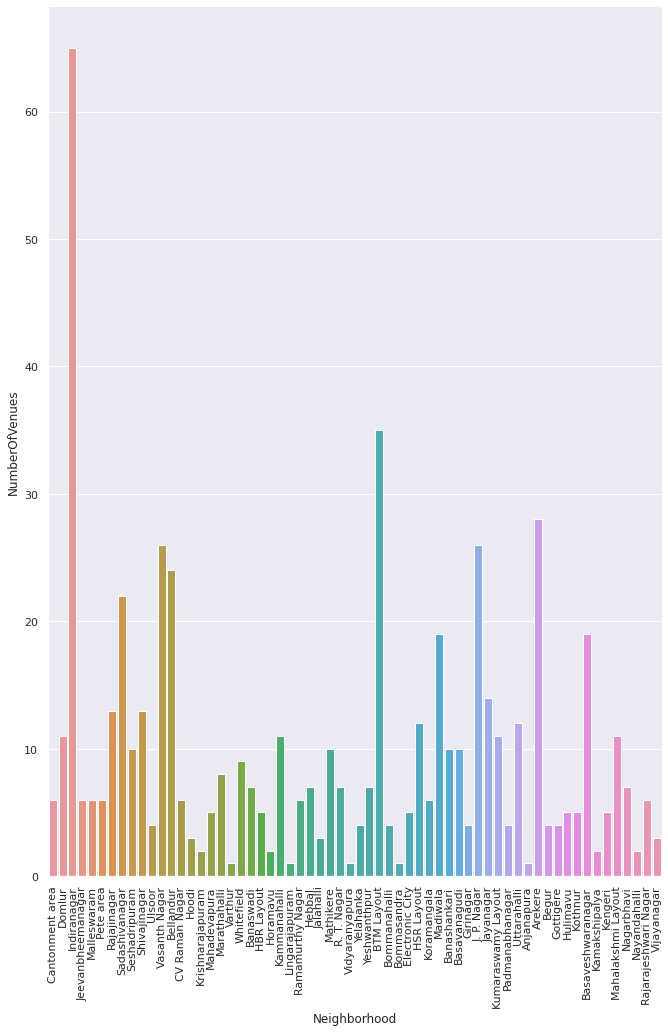

In [41]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues followed by BTM layout and further more



In [42]:
#Exploring Whitefield venues

bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
237,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
238,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
239,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
240,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
241,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
242,Whitefield,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
243,Whitefield,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
244,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
245,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [43]:
#One hot encoding for letting us to compare different venues based on some common scale

bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])


In [44]:
bangalore_venues_onehot


,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
1,Arekere,0.00,0.0,0.0,0.0,0.035714,0.0,0.0,0.035714,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
2,BTM Layout,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.057143,...,0.0,0.0,0.0,0.00,0.0,0.0,0.057143,0.0,0.0,0.0
3,Banashankari,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
4,Banaswadi,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.285714,...,0.0,0.0,0.0,0.00,0.0,0.0,0.142857,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,1.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
58,Vijayanagar,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
59,Whitefield,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.111111,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
60,Yelahanka,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0


In [46]:
number_of_top_venues = 5


In [47]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1  Venue Category_Performing Arts Venue        0.0
2        Venue Category_Paintball Field        0.0
3           Venue Category_Outlet Store        0.0
4           Venue Category_Optical Shop        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Shop       0.14
2          Venue Category_Pizza Place       0.07
3       Venue Category_Breakfast Spot       0.04
4   Venue Category_Chinese Restaurant       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.20
1      Venue Category_Ice Cream Shop       0.09
2         Venue Category_Snack Place       0.09
3  Venue Category_Chinese Restaurant       0.09
4         Venue Category_Coffee Shop       0.06


--------- Banash

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants



In [48]:

def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [49]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Cupcake Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Chinese Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,Venue Category_Pizza Place
3,Banashankari,Venue Category_Café,Venue Category_North Indian Restaurant,Venue Category_Breakfast Spot,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Sporting Goods Shop,Venue Category_Motorcycle Shop,Venue Category_Yoga Studio
4,Banaswadi,Venue Category_Bakery,Venue Category_Market,Venue Category_Café,Venue Category_Dessert Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop


In [50]:
neighborhoods_venues_sorted.shape


(62, 11)

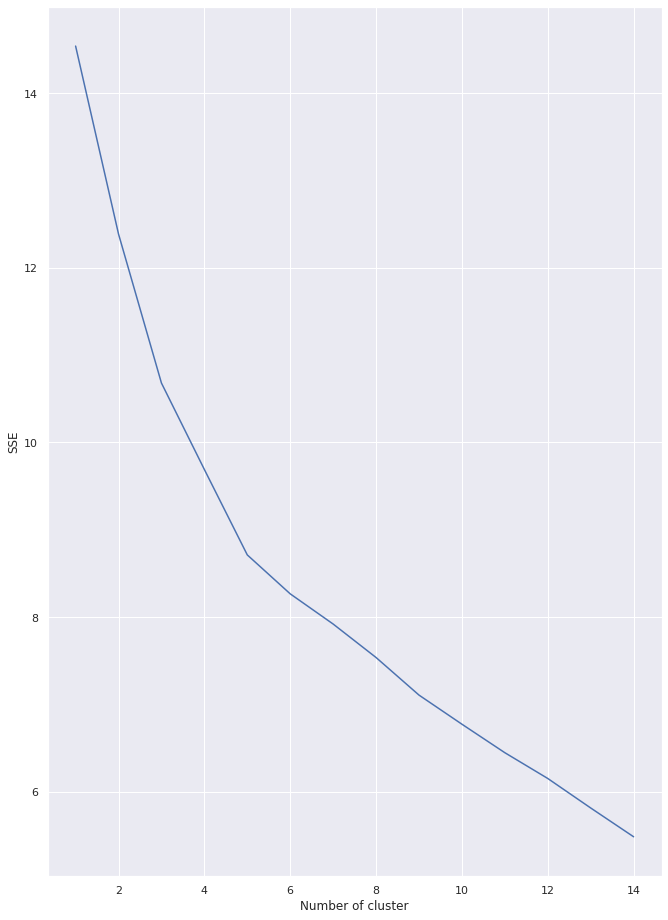

In [51]:
#Next challenge is to find the optimal k value for clustering and we do it using the elbow method

sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, we can see the optimal value for cluster is 5.


In [52]:
kmeans = KMeans(n_clusters=5,random_state=0)


In [53]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [54]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_


In [55]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()



Cluster
0     8
1    21
2    11
3    17
4     5
Name: Neighborhood, dtype: int64

In [56]:
bangalore_venues_grouped.columns


Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Travel & Transport',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=133)

In [57]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')


In [58]:
neighborhoods_venues_sorted.head(4)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Cupcake Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Liquor Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,0.0,1
3,Banashankari,Venue Category_Café,Venue Category_North Indian Restaurant,Venue Category_Breakfast Spot,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Sporting Goods Shop,Venue Category_Motorcycle Shop,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [59]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [60]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)


In [61]:

# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [62]:
map_clusters

In [63]:
#Finding similar locations based on user input (recommending location)
#We need to analyze factors such as population and Income to recommend.


bangalore_income.head()


,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [64]:
bangalore_population.head()


,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [65]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [66]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [67]:
bangalore_venues_grouped.head(1)


,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [68]:
#recommending Veg restaurants¶

bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0


In [69]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']


0     0
1     0
2     2
3     0
4     1
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [70]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]


In [71]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)


In [72]:
bangalore_veg.head()


,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [73]:

bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [74]:
bangalore_veg.head(10)


,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [75]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


In [76]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']


In [77]:
target_cluster_dataframe.reset_index()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,572,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,573,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,574,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,575,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,576,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,577,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
6,578,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
7,579,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
8,580,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Café,...,0.0,0.0,2,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [78]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']


In [79]:
target_cluster


2

In [80]:
print("The target cluster is : ",target_cluster)


The target cluster is :  2


In [81]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
110,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Samruddi Kuteera,12.878837,77.636850,Food Court
111,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Star Bazaar,12.878350,77.637720,Supermarket
112,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Lelijiye,12.879540,77.639470,Clothing Store
113,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Axis Bank ATM,12.877700,77.633790,ATM
166,Electronic City,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Auto Garage,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza


In [82]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))


There are 64 neighborhoods which has similar characteristics to Whitefield.


In [83]:
possible_neighborhoods.reset_index().head()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,110,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Samruddi Kuteera,12.878837,77.636850,Food Court
1,111,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Star Bazaar,12.878350,77.637720,Supermarket
2,112,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Lelijiye,12.879540,77.639470,Clothing Store
3,113,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthernSuburbs,12.878800,77.637700,Axis Bank ATM,12.877700,77.633790,ATM
4,166,Electronic City,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Auto Garage,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza


In [84]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [86]:
possible_neighborhoods.head()


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,Samruddi Kuteera,12.878837,77.636850,Food Court,594887,0.604797,61640.098300,0.953525,0,1.0
1,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,Star Bazaar,12.878350,77.637720,Supermarket,594887,0.604797,61640.098300,0.953525,0,1.0
2,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,Lelijiye,12.879540,77.639470,Clothing Store,594887,0.604797,61640.098300,0.953525,0,1.0
3,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,Venue Category_Food Court,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,Axis Bank ATM,12.877700,77.633790,ATM,594887,0.604797,61640.098300,0.953525,0,1.0
4,Electronic City,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Auto Garage,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,e-Toll Gate,12.842121,77.675325,Toll Plaza,781260,0.794275,8350.934536,0.129182,0,1.0


In [87]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [88]:
recommended_neighborhoods.head()


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Kamakshipalya,Venue Category_ATM,Venue Category_South Indian Restaurant,Venue Category_Hyderabadi Restaurant,Venue Category_Food Court,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,...,12.987290,77.526848,ATM,968497,0.984631,39132.40299,0.605348,0,1.0,0.804187
1,Kamakshipalya,Venue Category_ATM,Venue Category_South Indian Restaurant,Venue Category_Hyderabadi Restaurant,Venue Category_Food Court,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,...,12.985725,77.527079,South Indian Restaurant,968497,0.984631,39132.40299,0.605348,0,1.0,0.804187
2,Pete area,Venue Category_Market,Venue Category_Metro Station,Venue Category_Flower Shop,Venue Category_Historic Site,Venue Category_Bus Station,Venue Category_Fast Food Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.962529,77.575816,Historic Site,730999,0.743177,50712.43022,0.784482,0,1.0,0.746157
3,Pete area,Venue Category_Market,Venue Category_Metro Station,Venue Category_Flower Shop,Venue Category_Historic Site,Venue Category_Bus Station,Venue Category_Fast Food Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.966987,77.574840,Metro Station,730999,0.743177,50712.43022,0.784482,0,1.0,0.746157
4,Pete area,Venue Category_Market,Venue Category_Metro Station,Venue Category_Flower Shop,Venue Category_Historic Site,Venue Category_Bus Station,Venue Category_Fast Food Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.962799,77.571726,Market,730999,0.743177,50712.43022,0.784482,0,1.0,0.746157


In [89]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [90]:
top3_df = pd.DataFrame(top3).reset_index()


In [91]:
top3_df.head(3)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Begur,Venue Category_ATM,Venue Category_Clothing Store,Venue Category_Supermarket,[0.7361321887298261]
1,Electronic City,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Auto Garage,[0.5423513638776338]
2,Kamakshipalya,Venue Category_ATM,Venue Category_South Indian Restaurant,Venue Category_Hyderabadi Restaurant,[0.8041873599273973]


Here, according the data, we see that 'Begur,Electronic City and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
Here our model will recommend these neighborneeds and top 3 common venues to visit.

